# k-Means 
#### Masters degree program Applied Data Science

## Import modules

In [89]:
import math  # square root

import numpy as np  # data manipulation
from sklearn.datasets import make_blobs  # data generation / preparation
from sklearn.cluster import KMeans  # k-means implementation from scikit
import matplotlib.pyplot as plt  # plots and visualization
import seaborn as sns

## Generate dataset

### Generate samples using make_blobs

In [90]:
# create dataset
X, y = make_blobs(
    n_samples=200,  # number of samples
    n_features=2,  # number of features (2-dimensional)
    centers=3,  # number of clusters to be generated
    cluster_std=1,  # standard deviation for each Gaussian cluster ("how spread out numbers are from their mean")
    random_state=0  # for reproduction. same r_state = same result
)
print("the first 10 entries:")
print(X[0:10, :])
print("labels of the first 10 entries:")
print(y[0:10])
cluster_0_indices = np.where(y == 0)[0]
print(
    f"the mean of the all entries in cluster 0 is {np.sum(X[cluster_0_indices, 0]) / len(cluster_0_indices)} {np.sum(X[cluster_0_indices, 1]) / len(cluster_0_indices)}")

the first 10 entries:
[[-1.73380769  3.79806117]
 [ 0.62835793  4.4601363 ]
 [ 1.1312175   4.68194985]
 [-1.42917905  3.50083594]
 [ 1.27450825  5.63017322]
 [-0.75365104  1.73400162]
 [ 2.5763324   0.32187569]
 [ 1.55723507  2.82719571]
 [ 1.10318217  4.70577669]
 [-1.71755751  2.52303275]]
labels of the first 10 entries:
[2 0 0 2 0 2 1 1 0 2]
the mean of the all entries in cluster 0 is 0.9551988277566075 4.489474359775159


### Plot and explore the data

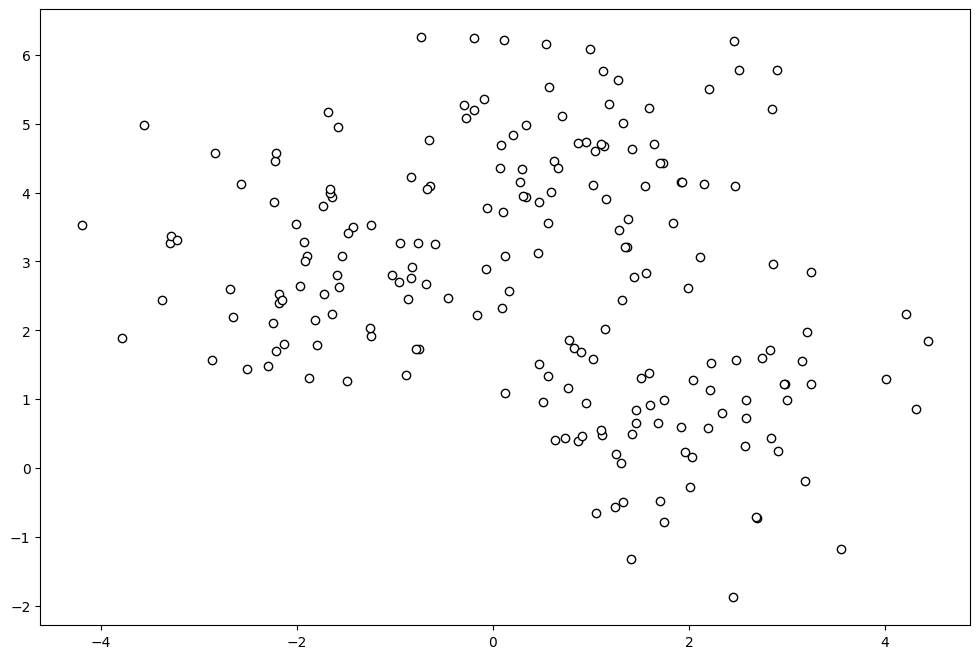

In [91]:
# plot
plt.figure(figsize=(12, 8))  # manipulate the size of the figure
plt.scatter(  # do a scatter-plot
    X[:, 0], X[:, 1],
    c='white',
    #c = y,                     # use labels for coloring
    edgecolor='black',
    marker='o'
)

## Calculate and output the population standard deviation of X 

Standard deviation in each cluster
###### Normal Distribution
<div><img src="https://drive.google.com/uc?id=1-9ySON0Il_xW4tw3VrYZ38qBKp818qzR" width=600></div>

### Using numpy package

In [92]:
# using numpy
import numpy as np

for c in range(0, max(y) + 1):
    c_indices = np.where(y == c)
    print(f"cluster = {c}, sigma = {np.std(X[c_indices, 0] + np.std(X[c_indices, 1]) / 2)} using numpy")

cluster = 0, sigma = 0.9827980353668738 using numpy
cluster = 1, sigma = 0.999994995190606 using numpy
cluster = 2, sigma = 0.9611600536589446 using numpy


### Using statistics package

In [93]:
# using statistics package
import statistics

for c in range(0, max(y) + 1):
    c_indices = np.where(y == c)[0]
    print(
        f"cluster = {c},sigma = {statistics.pstdev(np.asarray(X[c_indices, 0]) + statistics.pstdev(np.asarray(X[c_indices, 1])) / 2)} using statistics package")

cluster = 0,sigma = 0.9827980353668737 using statistics package
cluster = 1,sigma = 0.999994995190606 using statistics package
cluster = 2,sigma = 0.9611600536589447 using statistics package


### HW - solved → Implement without using a predefined method or function
I used **SAMPLE** population variance due to the fact that statistics.pstdev was used

In [94]:
for i in range(0, max(y) + 1):
    i_indices = np.where(y == i)[0]
    # Compute means for x and y values
    mean1 = np.sum(X[i_indices, 0]) / len(X[i_indices])
    mean2 = np.sum(X[i_indices, 1]) / len(X[i_indices])
    # Compute deviations
    deviation1 = [(x[0] - mean1) ** 2 for x in X[i_indices]]
    deviation2 = [(x[1] - mean2) ** 2 for x in X[i_indices]]
    # Compute variance
    variance1 = np.sum(deviation1) / (len(X[i_indices])-1)
    variance2 = np.sum(deviation2) / (len(X[i_indices])-1)
    # Compute standard deviation
    stdev = (math.sqrt(variance1) + math.sqrt(variance2)) / 2
    print(f"cluster = {i}, sigma = {stdev} using Darian's brain")

cluster = 0, sigma = 0.9886407763604772 using Darian's brain
cluster = 1, sigma = 0.9787027814760543 using Darian's brain
cluster = 2, sigma = 0.9624667816158474 using Darian's brain


### [Reference](https://stackabuse.com/calculating-variance-and-standard-deviation-in-python/)

## Clustering

### k-Means model initialization

In [95]:
k = 3  # number of clusters
kmeans = KMeans(
    n_clusters=k,  # set the number of clusters
    init='random',  # initial position of cluster centers
    n_init=1,  # number of k-Means runs with different initial centers
    max_iter=10,  # maximum number of iterations within a single run
    tol=1e-04,  # tolerance (metrics) for convergence
    verbose=2,  # output verbosity level (2 ... output inertia)
    random_state=2,  # reproduction parameters
)

### Model training and prediction

In [96]:
y_pred = kmeans.fit_predict(X)
print(f"predicted labels = {y_pred}")
print(f"centroids = {kmeans.cluster_centers_}")
print(f"inertia (i.e., the within cluster sum of squares) = {kmeans.inertia_}")

Initialization complete
Iteration 0, inertia 782.5531906202905.
Iteration 1, inertia 575.0165632191346.
Iteration 2, inertia 524.7585887783963.
Iteration 3, inertia 443.04954073523646.
Iteration 4, inertia 383.70022809376457.
Iteration 5, inertia 360.5451054501368.
Iteration 6, inertia 358.65813390525364.
Iteration 7, inertia 358.4836566948039.
Converged at iteration 7: strict convergence.
predicted labels = [1 2 2 1 2 1 0 2 2 1 2 1 2 2 2 1 0 0 1 1 1 0 2 2 1 1 0 1 1 1 2 2 1 2 0 0 2
 0 0 1 0 1 1 1 2 2 2 1 2 2 2 0 1 1 1 1 0 0 2 2 1 2 2 0 0 1 0 0 1 0 0 2 2 1
 2 1 0 0 0 1 1 2 2 0 0 2 2 1 2 0 1 1 0 2 0 2 2 1 1 0 0 2 1 2 1 2 0 2 1 0 2
 1 0 2 2 2 2 0 1 1 0 0 1 2 0 1 1 0 1 2 1 0 0 0 2 0 0 2 0 1 1 1 2 0 0 2 1 1
 0 2 0 1 1 1 2 0 0 0 2 2 0 1 1 1 2 2 0 1 0 0 1 0 2 0 1 1 0 1 2 0 2 1 0 0 0
 0 1 0 2 2 1 1 0 0 0 0 1 0 2 0]
centroids = [[ 1.98410174  0.81302038]
 [-1.71656153  2.91261167]
 [ 0.97692125  4.56883102]]
inertia (i.e., the within cluster sum of squares) = 358.4836566948039


### Cluster plots

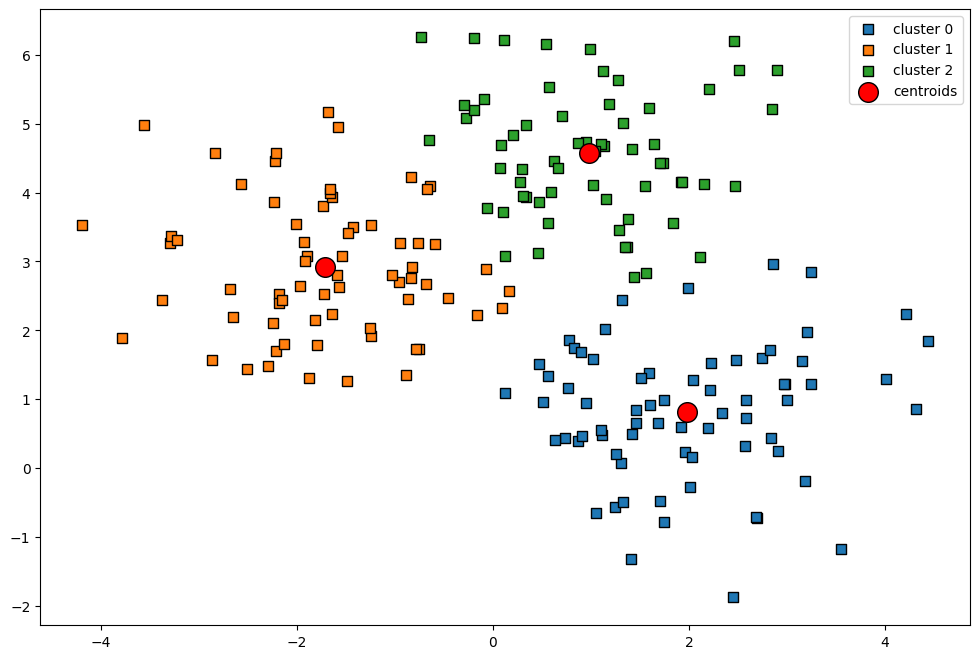

In [97]:
# generate a color palette
colors = sns.color_palette(None, k)

# plot the samples
plt.figure(figsize=(12, 8))  # manipulate the size of the figure
for c in range(0, k):
    plt.scatter(
        X[y_pred == c, 0], X[y_pred == c, 1],
        s=50,
        color=colors[c],
        marker='s',
        edgecolor='black',
        label='cluster ' + str(c)
    )

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, marker='o',
    color='red',
    edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)

### TODO - Solved → Change the clustering and plot the inertia for k in range(1,10)
### K-means clustering and initialization

In [98]:
k = 4  # number of clusters
kmeans_darian = KMeans(
    n_clusters=k,  # set the number of clusters
    init='k-means++',  # initial position of cluster centers
    n_init=4,  # number of k-Means runs with different initial centers
    max_iter=10,  # maximum number of iterations within a single run
    tol=1e-04,  # tolerance (metrics) for convergence
    verbose=2,  # output verbosity level (2 ... output inertia)
    random_state=3,  # reproduction parameters
    algorithm="elkan"  # type of algorithm used
)

### Train and predict model

In [99]:
y_pred = kmeans_darian.fit_predict(X)
print(f"predicted labels = {y_pred}")
print(f"centroids = {kmeans_darian.cluster_centers_}")
print(f"inertia (i.e., the within cluster sum of squares) = {kmeans_darian.inertia_}")

Initialization complete
Iteration 0, inertia 500.79144055251993
Iteration 1, inertia 321.3704500635447
Iteration 2, inertia 319.823854505669
Iteration 3, inertia 319.61155507637346
Iteration 4, inertia 319.32363433656536
Iteration 5, inertia 319.0083036644707
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 355.58872167669404
Iteration 1, inertia 311.3070301536677
Iteration 2, inertia 305.7321825214818
Iteration 3, inertia 305.3995538614736
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 480.90697315940963
Iteration 1, inertia 327.28191596019394
Iteration 2, inertia 320.61071182995875
Iteration 3, inertia 317.59533098777945
Iteration 4, inertia 316.83124614301363
Iteration 5, inertia 316.72796031306973
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 454.0723639829075
Iteration 1, inertia 327.79168776253994
Iteration 2, inertia 311.6384186488957
Iteration 3, in

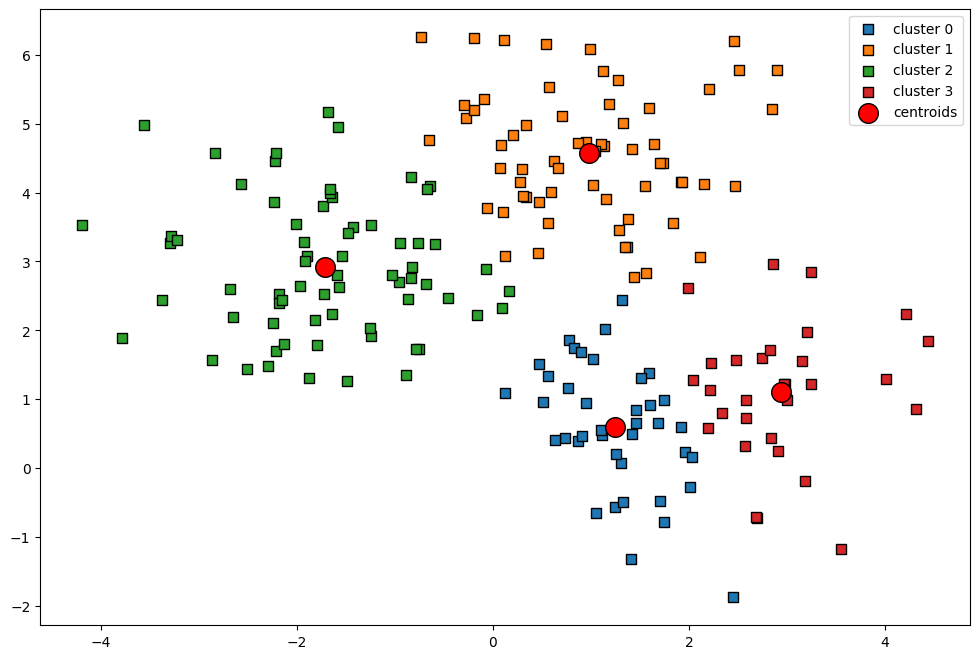

In [100]:
# generate a color palette
colors = sns.color_palette(None, k)

# plot the samples
plt.figure(figsize=(12, 8))  # manipulate the size of the figure
for c in range(0, k):
    plt.scatter(
        X[y_pred == c, 0], X[y_pred == c, 1],
        s=50,
        color=colors[c],
        marker='s',
        edgecolor='black',
        label='cluster ' + str(c)
    )

# plot the centroids
plt.scatter(
    kmeans_darian.cluster_centers_[:, 0], kmeans_darian.cluster_centers_[:, 1],
    s=200, marker='o',
    color='red',
    edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)

## My k-Means clustering implementation
### TODO - Solved → Implement the k-Means clustering algorithm without using any clustering package

### Helper functions

In [101]:
# calculate random centroids
def random_centers(data, k):
    centers = []
    for i in range(k):
        center = []
        for d in data:
            rand = random.uniform(-7.5, 10.0)
            center.append(rand)
        centers.append(center)
    return centers

# calculate Euclidean distance
def Distance2Point(point1, point2):
    dis = math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)
    return dis

# get cluster number for each data point
def get_labels(data, centroids):
    labels = []
    for point in data:
        min_dist = float('inf')
        label = None
        for i, centroid in enumerate(centroids):
            new_dist = Distance2Point(point, centroid)
            if new_dist < min_dist:
                min_dist = new_dist
                label = i
        labels.append(label)
    return labels

# update the centroids after each assignment of clusters
def update_centroids(points, labels, k):
    new_centroids = [[0, 0] for i in range(k)]
    counts = [0] * k

    for point, label in zip(points, labels):
        new_centroids[label][0] += point[0]
        new_centroids[label][1] += point[1]
        counts[label] += 1

    for i, (x, y) in enumerate(new_centroids):
        new_centroids[i] = (x / counts[i], y / counts[i])

    return new_centroids

# check if there are still movements or not, if not then stop
def should_stop(old_centroids, new_centroids, threshold=1e-04):
    total_movement = 0
    for old_point, new_point in zip(old_centroids, new_centroids):
        total_movement += Distance2Point(old_point, new_point)
    return total_movement < threshold

### Main

In [102]:
import random  # random numbers

# choose the number of clusters
k = 2
iters = 100
# generate data sample
data = []
# generate random data points
for i in range(iters):
    x_1 = random.uniform(-10.0, 10.0)
    y_1 = random.uniform(-10.0, 10.0)
    point = [x_1, y_1]
    data.append(point)

print(data[:10])

[[7.348973172074562, -9.363392310314367], [-9.802693759917837, 8.001811111889083], [6.680395690044506, -9.157849919632884], [5.720688557651016, 0.7554178117443673], [-9.32772604698136, 0.06125239554755524], [-3.3146730444411565, -1.2333966227096091], [9.981555930728543, -7.841493736925185], [1.8629974009079966, 7.358657973714774], [-1.447716901161364, 9.878716254864479], [-9.009152686113378, 7.559827331621769]]


In [103]:
# main function
def darian_kmeans(data, k):
    centroids = random_centers(data, k)

    while True:
        old_centroids = centroids
        labels = get_labels(data, centroids)
        centroids = update_centroids(data, labels, k)
        if should_stop(old_centroids, centroids):
            break
    return labels, centroids


new_kmean, centroids = darian_kmeans(data, k)
print(new_kmean)

[0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0]


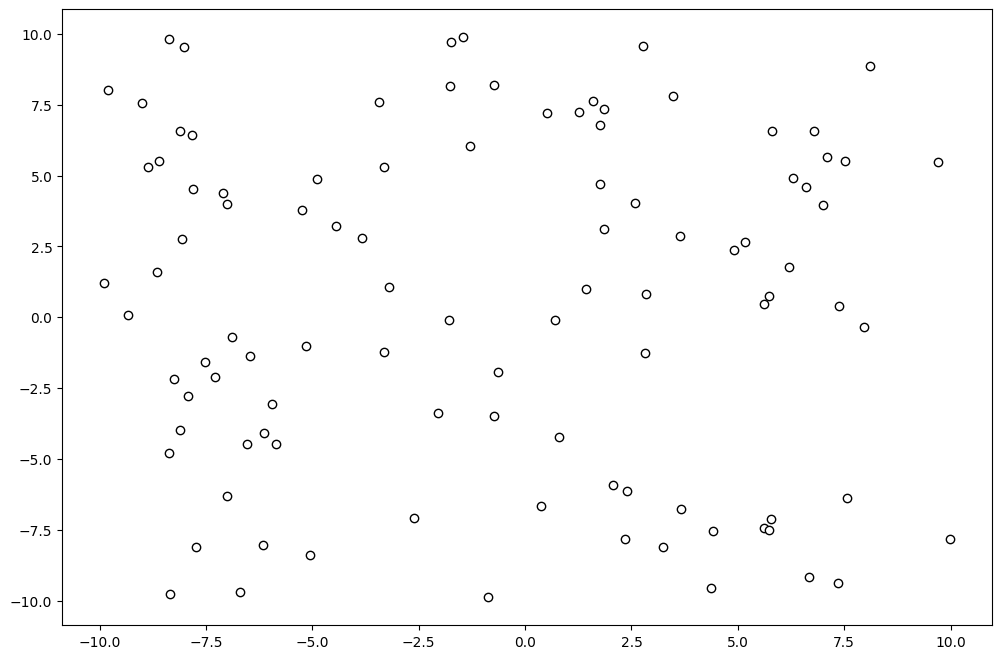

In [104]:
# plot the data before clustering
x_data = []
y_data = []
for i in data:
    x_data.append(i[0])
    y_data.append(i[1])
# plot
plt.figure(figsize=(12, 8))  # manipulate the size of the figure
plt.scatter(  # do a scatter-plot
    x_data, y_data,
    c='white',
    #c = y,                     # use labels for coloring
    edgecolor='black',
    marker='o'
)

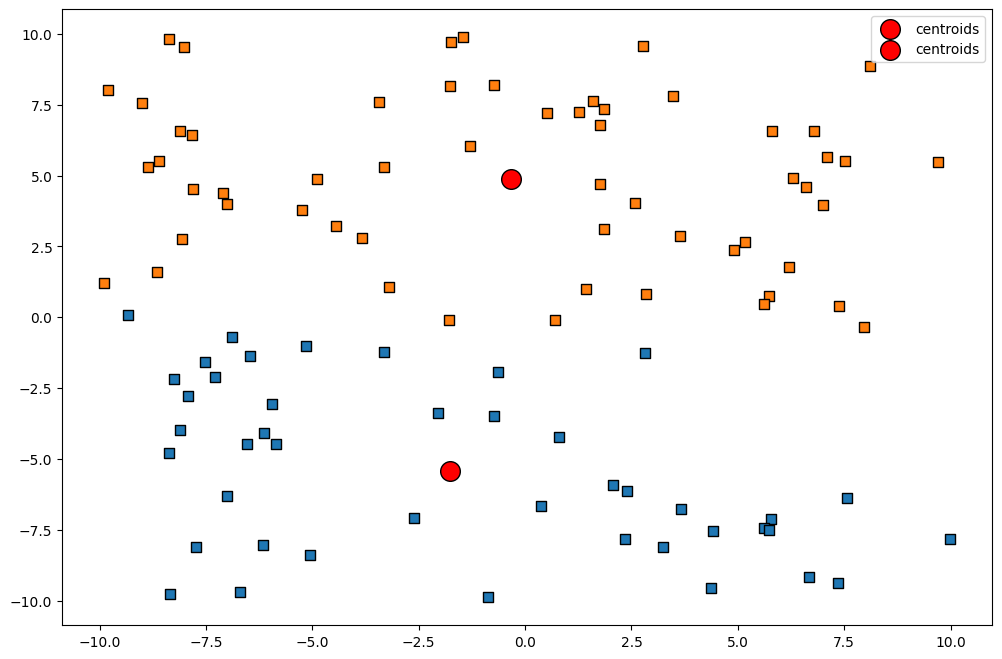

In [105]:

# generate a color palette
colors = sns.color_palette(None, k)
# plot the samples
plt.figure(figsize=(12, 8))  # manipulate the size of the figure
for c in range(0, len(new_kmean)):
    plt.scatter(
        x_data[c], y_data[c],
        s=50,
        color=colors[new_kmean[c]],
        marker='s',
        edgecolor='black'
    )

# plot the centroids
for i in centroids:
    plt.scatter(
        i[0], i[1],
        s=200, marker='o',
        color='red',
        edgecolor='black',
        label='centroids'
    )
plt.legend(scatterpoints=1)

### References:
- [Main reference](https://www.youtube.com/watch?v=uLs-EYUpGAw)
- [Ideas of thought](https://www.linkedin.com/pulse/clustering-using-k-means-python-from-scratch-venkata-sai-nikhila/#)
- [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- [Second thoughts](https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42)
- [K-means from scratch from GitHub](https://github.com/CihanBosnali/Machine-Learning-without-Libraries/blob/master/K-Means-Clustering/K-Means-Clustering-without-ML-libraries.ipynb)
- [Idea to create K-meas into methods not classes](https://ai538393399.wordpress.com/2020/09/29/k-means-clustering-algorithm-without-libraries/)
- [First idea](https://neptune.ai/blog/k-means-clustering#:~:text=%E2%80%9CK%2Dmeans%20clustering%20is%20a,prototype%20of%20the%20cluster.%E2%80%9D%20%E2%80%93)
- [Randomization](https://pynative.com/python-get-random-float-numbers/)
- [Further research, but stopped there](https://www.sharpsightlabs.com/blog/sklearn-predict/)

## Hierarchical Clustering without packages

In [106]:
# create dataset
X, y = make_blobs(
    n_samples=200,  # number of samples
    n_features=2,  # number of features (2-dimensional)
    centers=3,  # number of clusters to be generated
    cluster_std=1,  # standard deviation for each Gaussian cluster ("how spread out numbers are from their mean")
    random_state=0  # for reproduction. same r_state = same result
)
X, y

(array([[-1.73380769,  3.79806117],
        [ 0.62835793,  4.4601363 ],
        [ 1.1312175 ,  4.68194985],
        [-1.42917905,  3.50083594],
        [ 1.27450825,  5.63017322],
        [-0.75365104,  1.73400162],
        [ 2.5763324 ,  0.32187569],
        [ 1.55723507,  2.82719571],
        [ 1.10318217,  4.70577669],
        [-1.71755751,  2.52303275],
        [ 0.57309313,  5.5262324 ],
        [-0.83313086,  2.75830882],
        [ 1.7373078 ,  4.42546234],
        [ 1.37227679,  3.21072582],
        [ 0.06897171,  4.35573272],
        [-0.95961374,  2.69520716],
        [ 2.84159548,  0.43124456],
        [ 2.19722068,  0.57833524],
        [ 0.1631238 ,  2.57750473],
        [-3.55758848,  4.98237512],
        [-0.94838252,  3.26753672],
        [ 1.3105127 ,  0.07122512],
        [ 1.0220286 ,  4.11660348],
        [ 1.92352205,  4.14877723],
        [-3.78246824,  1.89537542],
        [-0.63762777,  4.09104705],
        [ 1.41164912, -1.32573949],
        [-2.29104794,  1.480

In [163]:
"""
This hierarchical clustering is based on agglomerative single linkage
"""

# calculate Euclidean distance
def Distance2Point(point1, point2):
    dis = math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)
    return dis

def find_smallest_distance(Ci, Cj):
    dist = 2**31-1
    for i in Ci:
        for j in Cj:
            if Distance2Point(i, j)<dist:
                dist = Distance2Point(i, j)
    print(dist)
    return dist

def hierarchical_clustering(X, y):
    X = X.tolist()
    assign_cluster = dict()
    k = 0
    for i in X:
        assign_cluster[k] = [i]
        k+=1

    assign_cluster = {int(k):v for k,v in assign_cluster.items()}
    # print(assign_cluster)
    min_cluster_dist = 2**31-1
    m = len(assign_cluster.keys())
    # print(assign_cluster)
    while m > 1:
        for key, value in assign_cluster.items():
            if key+1 <= max(assign_cluster.keys()):
                small = find_smallest_distance(assign_cluster[key], assign_cluster[key+1])
                if small < min_cluster_dist:
                    min_cluster_dist = small

        for key, val in list(assign_cluster.items()):
            if key+1 <= max(assign_cluster.keys()):
                small_two = find_smallest_distance(assign_cluster[key], assign_cluster[key+1])
                # merge condition
                if small_two == min_cluster_dist:
                    if len(val) != 0:
                        # val.append(assign_cluster[key+1][0])
                        assign_cluster[key].append(assign_cluster[key+1][0])
                        # print(assign_cluster[key])
                        val.pop(assign_cluster[key+1].index(assign_cluster[key+1][0]))
                        m-=1

hierarchical_clustering(X,y)

2.4531958499891764
0.5496080452258647
2.8196915701608125
3.4415116259796097
4.3924461590109125
3.617027690493142
2.7046603821914306
1.9326744483231235
3.5666431633454247
3.7770740644109178
3.104652449315668
3.0637486496623403
1.2683975976750106
1.7348328263163195
1.953287784854551
4.424332511163546
0.6609497328358838
2.852056936642396
4.430248467198625
3.1222790592040206
3.913951381560053
4.055651504055622
0.9020673987456641
6.134830472380948
3.8354915603121067
5.791468913568766
4.645712974952611
3.046603841267318
1.5505138494465964
3.030768460403224
3.353150079231776
4.300545846844117
2.3238992076576377
4.180643165653821
2.0508044923339837
4.212909270628792
4.328550817078305
1.5609355037761992
6.838807908068866
4.887634938861361
3.8708895831114245
1.3427253415400373
2.6342214969200435
3.8117501676610894
0.7027982679577064
2.2355705567175765
2.019702997422195
3.791942439635261
2.0567157972232972
0.9662733397409837
3.6961096932403272
4.477896671000519
2.821605045910777
1.237448479343927

https://github.com/OlaPietka/Agglomerative-Hierarchical-Clustering-from-scratch/blob/main/clustering_algorithm.py
https://github.com/mithunjmistry/hierarchical-clustering/blob/master/HierarchicalClustering.ipynb
https://www.researchgate.net/post/how_to_code_the_hierarchical_clustering_algorithm_with_single_linkage_method_without_using_Scikit-Learn_in_python
https://rpubs.com/aaronsc32/hierarchical-clustering-single-linkage-algorithm
https://github.com/Darkprogrammerpb/DeepLearningProjects_when_I_was_a_noob/blob/master/Project40/agglomerative_hierarchial_clustering/Hierarchial%20Agglomerative%20clustering.ipynb